In [20]:
!pip install wordcloud

In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from datetime import datetime
from wordcloud import WordCloud

In [34]:
# Applies Seaborn styles
sns.set_theme(style="darkgrid")

In [35]:
# Create sample data (you can replace this with your actual data loading)
np.random.seed(42)

# Generate dates
dates = pd.date_range(start='2024-01-01', periods=60)

# Common search queries
search_terms = [
    'data analysis', 'machine learning', 'python tutorial',
    'data visualization', 'pandas tutorial', 'AI tools',
    'deep learning', 'neural networks', 'data science',
    'sql basics', 'python vs r', 'analytics jobs'
]

In [36]:
# Generate random data
data = []
for date in dates:
    # Generate 5-15 searches per day
    daily_searches = np.random.randint(5, 15)
    for _ in range(daily_searches):
        query = np.random.choice(search_terms)
        clicks = np.random.randint(0, 10)
        impressions = clicks + np.random.randint(5, 50)
        ctr = (clicks / impressions) * 100 if impressions > 0 else 0
        device = np.random.choice(['mobile', 'desktop', 'tablet'], p=[0.6, 0.3, 0.1])

        data.append({
            'date': date,
            'query': query,
            'clicks': clicks,
            'impressions': impressions,
            'ctr': round(ctr, 2),
            'device': device
        })

In [37]:
# Create DataFrame
df = pd.DataFrame(data)

In [38]:
# Display data info
print(f"Data shape: {df.shape}")
print("\nData sample:")
print(df.head())

Data shape: (574, 6)

Data sample:
        date               query  clicks  impressions    ctr   device
0 2024-01-01  data visualization       7           32  21.88   mobile
1 2024-01-01     python tutorial       6           21  28.57   mobile
2 2024-01-01     pandas tutorial       3           47   6.38  desktop
3 2024-01-01            AI tools       4           10  40.00  desktop
4 2024-01-01            AI tools       1           26   3.85  desktop


In [39]:
# Data summary
print("\nSummary statistics:")
print(df.describe())


Summary statistics:
                                date      clicks  impressions         ctr
count                            574  574.000000   574.000000  574.000000
mean   2024-01-29 06:13:47.874564352    4.477352    31.620209   16.531010
min              2024-01-01 00:00:00    0.000000     6.000000    0.000000
25%              2024-01-15 00:00:00    2.000000    20.000000    7.432500
50%              2024-01-28 00:00:00    4.000000    32.000000   14.290000
75%              2024-02-13 00:00:00    7.000000    43.000000   22.220000
max              2024-02-29 00:00:00    9.000000    58.000000   64.290000
std                              NaN    2.825095    13.407117   12.976434


In [40]:
# Calculate key metrics
total_clicks = df['clicks'].sum()
total_impressions = df['impressions'].sum()
overall_ctr = (total_clicks / total_impressions * 100).round(2)

print(f"\nKey Metrics:")
print(f"Total Clicks: {total_clicks}")
print(f"Total Impressions: {total_impressions}")
print(f"Overall CTR: {overall_ctr}%")


Key Metrics:
Total Clicks: 2570
Total Impressions: 18150
Overall CTR: 14.16%


In [41]:
# Device breakdown
device_stats = df.groupby('device').agg({
    'clicks': 'sum',
    'impressions': 'sum'
})
device_stats['ctr'] = (device_stats['clicks'] / device_stats['impressions'] * 100).round(2)
print("\nDevice Performance:")
print(device_stats)


Device Performance:
         clicks  impressions    ctr
device                             
desktop     794         5454  14.56
mobile     1466        10684  13.72
tablet      310         2012  15.41


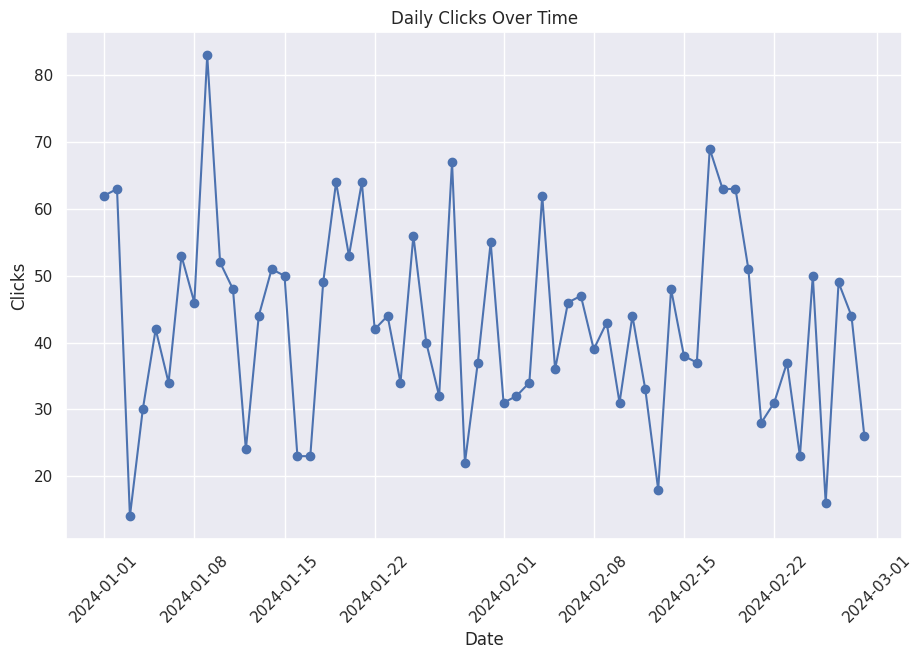

In [43]:
# Create visualizations dashboard
plt.figure(figsize=(18, 12))

# 1. Time Series Analysis - Daily Clicks
plt.subplot(2, 2, 1)
daily_clicks = df.groupby(df['date'].dt.date)['clicks'].sum()
plt.plot(daily_clicks.index, daily_clicks.values, marker='o', linestyle='-')
plt.title('Daily Clicks Over Time')
plt.xlabel('Date')
plt.ylabel('Clicks')
plt.xticks(rotation=45)
plt.tight_layout()

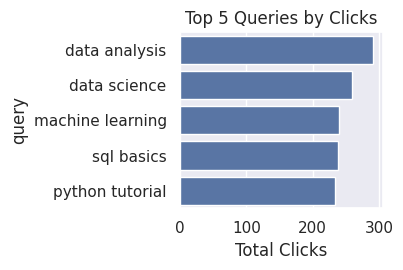

In [44]:
# 2. Top Queries by Clicks
plt.subplot(2, 2, 2)
top_queries = df.groupby('query')['clicks'].sum().sort_values(ascending=False).head(5)
sns.barplot(x=top_queries.values, y=top_queries.index)
plt.title('Top 5 Queries by Clicks')
plt.xlabel('Total Clicks')
plt.tight_layout()

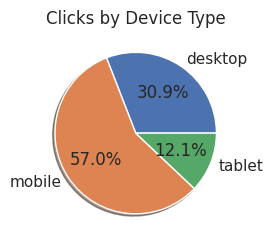

In [45]:
# 3. Device Distribution
plt.subplot(2, 2, 3)
device_counts = df.groupby('device')['clicks'].sum()
plt.pie(device_counts, labels=device_counts.index, autopct='%1.1f%%', shadow=True)
plt.title('Clicks by Device Type')
plt.tight_layout()

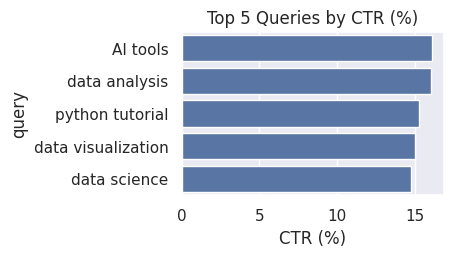

In [46]:
# 4. Click-Through Rate (CTR) by Query
plt.subplot(2, 2, 4)
query_metrics = df.groupby('query').agg({
    'clicks': 'sum',
    'impressions': 'sum'
})
query_metrics['ctr'] = (query_metrics['clicks'] / query_metrics['impressions'] * 100).round(2)
top_ctr = query_metrics.sort_values('ctr', ascending=False).head(5)
sns.barplot(x=top_ctr['ctr'], y=top_ctr.index)
plt.title('Top 5 Queries by CTR (%)')
plt.xlabel('CTR (%)')
plt.tight_layout()

plt.subplots_adjust(hspace=0.4, wspace=0.3)
plt.savefig('search_analysis_dashboard.png')
plt.show()

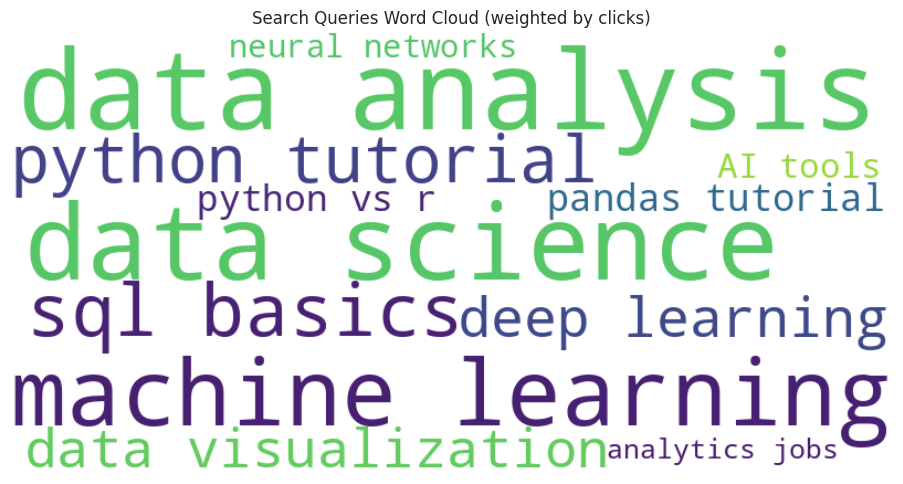

In [47]:
# Generate word cloud from search queries
query_weights = df.groupby('query')['clicks'].sum().to_dict()

# Create word cloud
wordcloud = WordCloud(
    width=800,
    height=400,
    background_color='white',
    max_words=50,
    max_font_size=100,
    random_state=42
).generate_from_frequencies(query_weights)

# Plot word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Search Queries Word Cloud (weighted by clicks)')
plt.tight_layout()
plt.savefig('search_queries_wordcloud.png')
plt.show()

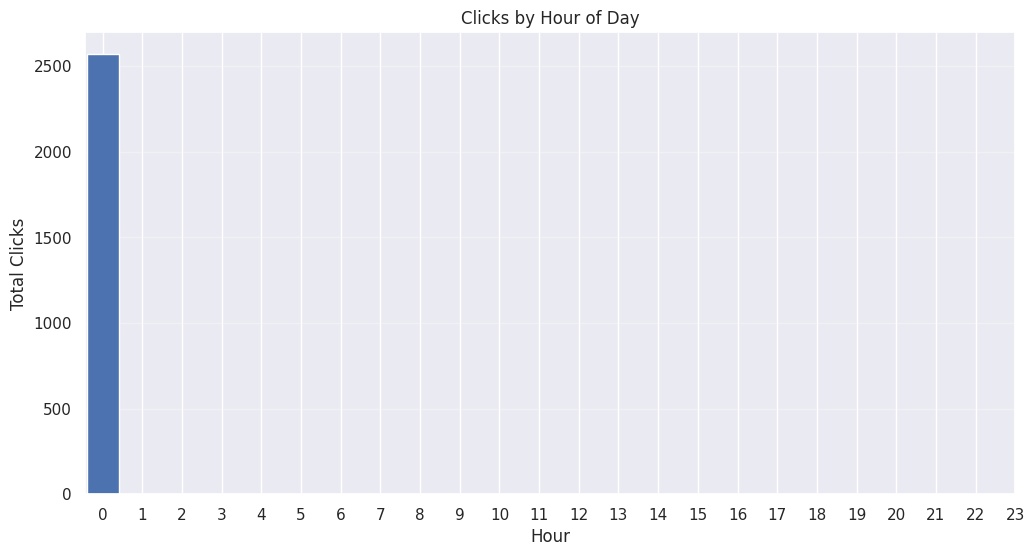

In [48]:
# Additional analysis: Hourly pattern
plt.figure(figsize=(12, 6))
df['hour'] = df['date'].dt.hour
hourly_clicks = df.groupby('hour')['clicks'].sum()
plt.bar(hourly_clicks.index, hourly_clicks.values)
plt.title('Clicks by Hour of Day')
plt.xlabel('Hour')
plt.ylabel('Total Clicks')
plt.xticks(range(0, 24))
plt.grid(axis='y', alpha=0.3)
plt.savefig('hourly_clicks.png')
plt.show()

<Figure size 1400x700 with 0 Axes>

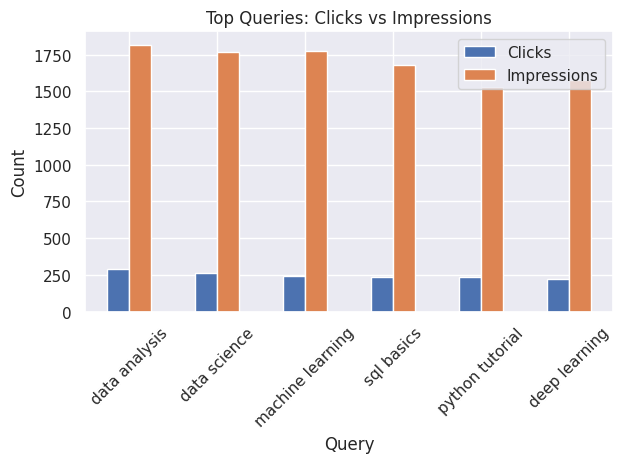


Analysis complete! All visualization images saved.


In [49]:
# Query performance comparison
plt.figure(figsize=(14, 7))
query_performance = df.groupby('query').agg({
    'clicks': 'sum',
    'impressions': 'sum'
}).sort_values('clicks', ascending=False).head(6)

query_performance.plot(kind='bar')
plt.title('Top Queries: Clicks vs Impressions')
plt.xlabel('Query')
plt.ylabel('Count')
plt.legend(['Clicks', 'Impressions'])
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('query_performance.png')
plt.show()